<a href="https://colab.research.google.com/github/omkar123katare/Capstone_2_Retail_sales_prediction/blob/main/retail_sales__predicton_capstone_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

#**Business Problem and KPI**

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

#**Translating Business problem into data science Problem**

There are two way we can solve this problem.
1. Machine Learning approach
2. Time series approach

##**Importing Libraries**

In [1]:
import pandas as pd

## **Mounting the drive and Importing Data from there**

In [2]:
# importing drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# import rossman store data from drive 
rossmann_store_data=pd.read_csv('/content/drive/MyDrive/Data Science Projects-AlmaBetter/Capstone_2_store_sales_prediction/Rossmann Stores Data.csv')
# import store data from drive 
store_df= pd.read_csv("/content/drive/MyDrive/Data Science Projects-AlmaBetter/Capstone_2_store_sales_prediction/store.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
# to check shape of both data which gives number of rows and columns in each data 
rossmann_store_data.shape, store_df.shape

((1017209, 9), (1115, 10))

##**Data Exploration**

# Steps involved in Data Exploration and Preparation
1. Variable Identification
2. Univariate Analysis
3. Bi-variate Analysis
4. Missing values treatment
5. Outlier treatment
6. Variable transformation
7. Variable creation

In [5]:
# Merging both the dataset on store columnn because it present on both the dataset
df_raw = pd.merge(rossmann_store_data,store_df , on = 'Store', how='left' )

In [6]:
df_raw.shape

(1017209, 18)

In [7]:
df_raw_copy=df_raw.copy()

In [8]:
% pip install inflection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Renaming the column names

In [9]:
import inflection

In [10]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo','StateHoliday', 'SchoolHoliday', 'StoreType',
            'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 
            'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

# creating list of new names with a snakecase pattern

cols_new = []
for elem in cols_old:
  cols_new.append(inflection.underscore(elem))
print(cols_new)

['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo', 'state_holiday', 'school_holiday', 'store_type', 'assortment', 'competition_distance', 'competition_open_since_month', 'competition_open_since_year', 'promo2', 'promo2_since_week', 'promo2_since_year', 'promo_interval']


In [11]:
df_raw.columns=cols_new
df_raw_copy.columns=cols_new

In [12]:
print(f'New column names in the merged dataframe are {list(df_raw.columns)}')

New column names in the merged dataframe are ['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo', 'state_holiday', 'school_holiday', 'store_type', 'assortment', 'competition_distance', 'competition_open_since_month', 'competition_open_since_year', 'promo2', 'promo2_since_week', 'promo2_since_year', 'promo_interval']


### Data Dimensions

In [13]:
print(f'Number of rows in the merged dataset are {df_raw.shape[0]}')
print(f'Number of columns in the merged dataset are {df_raw.shape[1]}')

Number of rows in the merged dataset are 1017209
Number of columns in the merged dataset are 18


### Column Data types

In [14]:
df_raw.head(5)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [15]:
df_raw.promo_interval.unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [16]:
df_raw['date']=pd.to_datetime(df_raw['date'])
df_raw['competition_open_since_year']=pd.to_datetime(df_raw['competition_open_since_year'])
df_raw['promo2_since_year']=pd.to_datetime(df_raw['promo2_since_year'])

In [17]:
df_raw.head(10)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,1970-01-01 00:00:00.000002008,0,NaN,NaT,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,1970-01-01 00:00:00.000002007,1,13.0,1970-01-01 00:00:00.000002010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,1970-01-01 00:00:00.000002006,1,14.0,1970-01-01 00:00:00.000002011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,1970-01-01 00:00:00.000002009,0,NaN,NaT,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,1970-01-01 00:00:00.000002015,0,NaN,NaT,NaN
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12.0,1970-01-01 00:00:00.000002013,0,NaN,NaT,NaN
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000.0,4.0,1970-01-01 00:00:00.000002013,0,NaN,NaT,NaN
7,8,5,2015-07-31,8492,833,1,1,0,1,a,a,7520.0,10.0,1970-01-01 00:00:00.000002014,0,NaN,NaT,NaN
8,9,5,2015-07-31,8565,687,1,1,0,1,a,c,2030.0,8.0,1970-01-01 00:00:00.000002000,0,NaN,NaT,NaN
9,10,5,2015-07-31,7185,681,1,1,0,1,a,a,3160.0,9.0,1970-01-01 00:00:00.000002009,0,NaN,NaT,NaN


In [18]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   store                         1017209 non-null  int64         
 1   day_of_week                   1017209 non-null  int64         
 2   date                          1017209 non-null  datetime64[ns]
 3   sales                         1017209 non-null  int64         
 4   customers                     1017209 non-null  int64         
 5   open                          1017209 non-null  int64         
 6   promo                         1017209 non-null  int64         
 7   state_holiday                 1017209 non-null  object        
 8   school_holiday                1017209 non-null  int64         
 9   store_type                    1017209 non-null  object        
 10  assortment                    1017209 non-null  object        
 11

### Checking for Null values

In [19]:
df_raw.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

### Missing values treatment

***competition_distance***

There are 2642 numll values in this column. Since values of competitors distance from shop is not available, we will assume that there is no compititor for the shop. We will fill the null values with a distance value greater than the maximum value in the column.

In [20]:
df_raw.competition_distance.max()

75860.0

I will assume that the compititor for the shops with null values in this column is at the distance of 100000 meters

In [21]:
import numpy as np

In [22]:
df_raw['competition_distance'][119210]==np.nan

False

In [23]:
df_raw['competition_distance'] = df_raw['competition_distance'].fillna(100000.0)

In [24]:
df_raw['competition_distance'].max()

100000.0

In [25]:
df_raw['competition_distance'].isna().sum()

0

***competition_open_since_month and competition_open_since_year:***

There are 323348 missing values in these columns. This is a big number. This could mean that 
1. Competitor dta is missing.
2. There is no competitor.
Second scenario seems unprobable. 

We will do missing value imputation in two ways

1. Fill empty cells with vlaue from date columm.
2. Remove the rows with empty cells.


In [26]:
# competition_open_since_month
df_raw['competition_open_since_month'].fillna( df_raw['date'].dt.month, inplace=True) 

In [27]:
# competition_open_since_year
df_raw['competition_open_since_year'].fillna(df_raw['date'].dt.year, inplace = True)

***promo2_since_week and promo2_since_year:***

If there are missing values in these columns, maybe it's because the store is not participating in promo2. So, we'll fill it out with the present date.

In [28]:
# promo2_since_week
df_raw['promo2_since_week'].fillna( df_raw['date'].dt.isocalendar().week, inplace=True )
# promo2_since_year
df_raw['promo2_since_year'].fillna( df_raw['date'].dt.year, inplace=True )

***promo_interval***


I'm going to create the column is_promo (dummy variable) to indicate whether a store is holding consecutive promo sales on that day and the promo_interval will be dropped in Step 3.

In [29]:
month_map = {1: 'Jan',  2: 'Feb',  3: 'Mar',  4: 'Apr',  5: 'May',  6: 'Jun',  7: 'Jul',  8: 'Aug',  9: 'Sep',  10: 'Oct', 11: 'Nov', 12: 'Dec'}

df_raw['promo_interval'].fillna('', inplace=True) 

# getting month abreviation
df_raw['month_map'] = df_raw['date'].dt.strftime( "%b" ) 

df_raw['is_promo'] = df_raw[['promo_interval', 'month_map']].apply(lambda x: x['month_map'] in x['promo_interval'].split( ',' ), axis='columns').astype('int')


###**1.6. Change Data Types**
Some features has float as type but they should be integer. So, they're going to be changed.

In [30]:
# changing the float type to integer type
# competition_open_since_month
df_raw['competition_open_since_month'] = df_raw['competition_open_since_month'].astype( int )
# competition_open_since_year
df_raw['competition_open_since_year'] = df_raw['competition_open_since_year'].astype( int )
# promo2_since_year
df_raw['promo2_since_year'] = df_raw['promo2_since_year'].astype( int )
# promo2_since_week
df_raw['promo2_since_week'] = df_raw['promo2_since_week'].astype( int )

TypeError: ignored

# Descriptive statistics

In [ ]:
# dividing data in numerical and categorical
num_attributes = df_raw.select_dtypes( include = ['int32', 'int64', 'float64'] )
cat_attributes = df_raw.select_dtypes( exclude = ['int32', 'int64', 'float64', 'datetime64[ns]'] )

In [ ]:
num_attributes

In [ ]:
df_raw.describe().transpose()

In [ ]:
num_attributes.columns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
# plotting distribution plots for finding the central tendency
plt.figure(figsize=(20, 8))

plt.subplot( 1,3,1)
sns.distplot( df_raw['sales'] )
plt.title( 'Sales Distribution' )

plt.subplot( 1,3,2 )
sns.distplot( df_raw['competition_distance'] )
plt.title( 'Competition Distance Distribution' );

plt.subplot( 1,3,3 )
sns.distplot( df_raw['customers'] )
plt.title( 'Customers Distribution' );

In EDA Section I'll check if sales distribution is or not normal.

1.7.2. Categorical Attributes

In [ ]:
# taking a first look at the levels of each categorical variables
cat_attributes.apply( lambda x: x.unique().shape[0] )

In [ ]:
# plotting box plot for categorical variables
plt.figure(figsize=(20,8))
aux = df_raw[( df_raw['state_holiday'] != '0' ) & ( df_raw['sales'] > 0 )]

plt.subplot( 1, 3, 1 )
sns.boxplot( x = 'state_holiday', y ='sales', data = aux )

plt.subplot( 1, 3, 2 )
sns.boxplot( x = 'store_type', y ='sales', data = aux )

plt.subplot( 1, 3, 3 )
sns.boxplot( x = 'assortment', y = 'sales', data = aux );

2.0. STEP 2: FEATURE ENGINEERING

####**2.1. Hypothesis Mind Map**
To better understand the relationship between the target variable (sales) and the features, I'll create some hypothesis based on the business problem to guide the feature engineering and then the exploratory data analysis.

In the EDA section, I'll validate these hypothesis and it'll let me have a good notion about the relation between the features and the target and it will help me to choose more accurately what feature to use when modeling.

However, before I do that, a mind map can be useful when creating all the hypothesis.

# Data Cleaning

# Step 3:  Hypothesis driven EDA

# Step 4: Outlier and missing value Treatment

# Step 5: Feature Engineering

# Step 6: ML solution Frameworks

# Step 7: Choice of Model

# Step 8: Choice of model Validation Framework

# Step 9: Choice of hyperparamer tuning methods

# Step 10: Choice of deployment solution framework

# Step 11: Impact on business problem

In [4]:
import pandas as pd

In [5]:
# import rossman store data from drive 
data1=pd.read_csv('/content/drive/MyDrive/Data Science Projects-AlmaBetter/Capstone_2_store_sales_prediction/Rossmann Stores Data.csv')
# import store data from drive 
data2= pd.read_csv("/content/drive/MyDrive/Data Science Projects-AlmaBetter/Capstone_2_store_sales_prediction/store.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
data1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
data2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
data2['CompetitionOpenSinceYear']=data2['CompetitionOpenSinceYear'].fillna('2015')

In [9]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   1115 non-null   object 
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(4), int64(2), object(4)
memory usage: 87.2+ KB


In [10]:
data2['CompetitionOpenSinceYear']=data2['CompetitionOpenSinceYear'].apply(lambda row:int(row))

In [11]:
data2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015,0,NaN,NaN,NaN


In [12]:
data2['Competition_age_in_years']=2015-data2['CompetitionOpenSinceYear']

In [13]:
data2['adder_month_temp']=data2['Competition_age_in_years']*12

In [14]:
data2['Competition_age_in_months']=data2['CompetitionOpenSinceMonth']=data2['adder_month_temp']

In [15]:
data2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Competition_age_in_years,adder_month_temp,Competition_age_in_months
0,1,c,a,1270.0,84,2008,0,NaN,NaN,NaN,7,84,84
1,2,a,a,570.0,96,2007,1,13.0,2010.0,"Jan,Apr,Jul,Oct",8,96,96
2,3,a,a,14130.0,108,2006,1,14.0,2011.0,"Jan,Apr,Jul,Oct",9,108,108
3,4,c,c,620.0,72,2009,0,NaN,NaN,NaN,6,72,72
4,5,a,a,29910.0,0,2015,0,NaN,NaN,NaN,0,0,0


In [16]:
pd.DataFrame(pd.DataFrame(data2['CompetitionOpenSinceYear']).value_counts()).sort_values(by='CompetitionOpenSinceYear')

,0
CompetitionOpenSinceYear,
1900,1
1961,1
1990,5
1994,2
1995,2
1998,1
1999,8
2000,10
2001,16


In [17]:
data2['CompetitionOpenSinceMonth'].unique()

array([  84,   96,  108,   72,    0,   24,   12,  180,   48,   60,  120,
        192,  144,   36,  132,  156,  648,  240,  168,  300,  252, 1380,
        204])

In [18]:
data2=data2.drop(['CompetitionOpenSinceYear','CompetitionOpenSinceMonth','adder_month_temp'],axis=1)

In [19]:
data2=data2.drop(['Promo2SinceWeek','Promo2SinceYear'],axis=1)

In [20]:
data2.head()

,Store,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Competition_age_in_years,Competition_age_in_months
0,1,c,a,1270.0,0,NaN,7,84
1,2,a,a,570.0,1,"Jan,Apr,Jul,Oct",8,96
2,3,a,a,14130.0,1,"Jan,Apr,Jul,Oct",9,108
3,4,c,c,620.0,0,NaN,6,72
4,5,a,a,29910.0,0,NaN,0,0


In [21]:
data2=data2.drop(['Competition_age_in_years'],axis=1)

In [22]:
new_df=pd.merge(data1,data2,on='Store',how='left')

In [23]:
new_df['Date']=pd.to_datetime(new_df['Date'])

In [24]:

new_df['Transaction_month'] = new_df['Date'].dt.strftime('%b')

In [25]:
new_df['PromoInterval'].fillna('Not_participating',inplace=True)

In [26]:
new_df.tail(30)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Competition_age_in_months,Transaction_month
1017179,1086,2,2013-01-01,0,0,0,0,a,1,a,a,180.0,1,"Feb,May,Aug,Nov",24,Jan
1017180,1087,2,2013-01-01,0,0,0,0,a,1,d,c,2210.0,0,Not_participating,48,Jan
1017181,1088,2,2013-01-01,0,0,0,0,a,1,a,a,4300.0,1,"Jan,Apr,Jul,Oct",72,Jan
1017182,1089,2,2013-01-01,0,0,0,0,a,1,d,a,5220.0,0,Not_participating,72,Jan
1017183,1090,2,2013-01-01,0,0,0,0,a,1,a,a,330.0,1,"Jan,Apr,Jul,Oct",0,Jan
1017184,1091,2,2013-01-01,0,0,0,0,a,1,a,c,9990.0,0,Not_participating,0,Jan
1017185,1092,2,2013-01-01,0,0,0,0,a,1,a,a,300.0,1,"Jan,Apr,Jul,Oct",180,Jan
1017186,1093,2,2013-01-01,0,0,0,0,a,1,c,c,10450.0,0,Not_participating,72,Jan
1017187,1094,2,2013-01-01,0,0,0,0,a,1,d,a,2380.0,1,"Jan,Apr,Jul,Oct",24,Jan
1017188,1095,2,2013-01-01,0,0,0,0,a,1,a,a,690.0,1,"Jan,Apr,Jul,Oct",96,Jan


In [27]:
new_df['promo_two_active']=new_df.apply(lambda x:x["Transaction_month"] in str(x['PromoInterval']).split(','),axis=1)

In [28]:
new_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Competition_age_in_months,Transaction_month,promo_two_active
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0,Not_participating,84,Jul,False
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,1,"Jan,Apr,Jul,Oct",96,Jul,True
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,1,"Jan,Apr,Jul,Oct",108,Jul,True
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,0,Not_participating,72,Jul,False
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,0,Not_participating,0,Jul,False


Now feature selection using varius statistical ttests, we choose the relevant columns

In [29]:
new_df['PromoInterval'].value_counts()

Not_participating    508031
Jan,Apr,Jul,Oct      293122
Feb,May,Aug,Nov      118596
Mar,Jun,Sept,Dec      97460
Name: PromoInterval, dtype: int64

In [30]:
dictt={'Jan,Apr,Jul,Oct':'Cycle1','Feb,May,Aug,Nov':'Cycle2','Mar,Jun,Sept,Dec':'Cycle3','Not_participating':'Not_participating'}
new_df['PromoInterval']=new_df['PromoInterval'].map(dictt)
new_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Competition_age_in_months,Transaction_month,promo_two_active
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0,Not_participating,84,Jul,False
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,1,Cycle1,96,Jul,True
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,1,Cycle1,108,Jul,True
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,0,Not_participating,72,Jul,False
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,0,Not_participating,0,Jul,False


In [31]:
new_df['Transaction_year']=new_df['Date'].dt.year

In [32]:
new_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Competition_age_in_months,Transaction_month,promo_two_active,Transaction_year
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0,Not_participating,84,Jul,False,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,1,Cycle1,96,Jul,True,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,1,Cycle1,108,Jul,True,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,0,Not_participating,72,Jul,False,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,0,Not_participating,0,Jul,False,2015


In [33]:
new_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Competition_age_in_months,Transaction_month,promo_two_active,Transaction_year
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0,Not_participating,84,Jul,False,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,1,Cycle1,96,Jul,True,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,1,Cycle1,108,Jul,True,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,0,Not_participating,72,Jul,False,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,0,Not_participating,0,Jul,False,2015


In [34]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [35]:
from matplotlib import pyplot as plt

In [36]:
import seaborn as sns



---



---



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Customers Distribution')

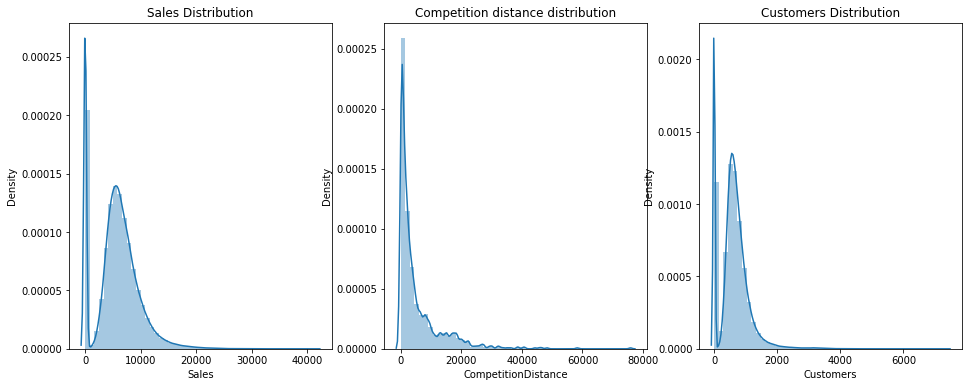

In [37]:
plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
sns.distplot(new_df['Sales'])
plt.title('Sales Distribution')

plt.subplot(1,3,2)
sns.distplot(new_df['CompetitionDistance'])
plt.title('Competition distance distribution')

plt.subplot(1,3,3)
sns.distplot(new_df['Customers'])
plt.title('Customers Distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Competition_age_distribution')

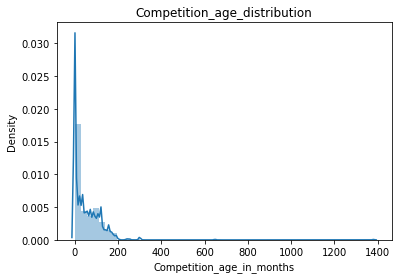

In [38]:
sns.distplot(new_df['Competition_age_in_months'])
plt.title('Competition_age_distribution')

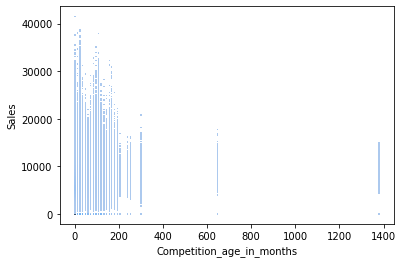

In [39]:
sns.histplot(x=new_df['Competition_age_in_months'],y=new_df['Sales'])

In [40]:
new_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'Promo2', 'PromoInterval',
       'Competition_age_in_months', 'Transaction_month', 'promo_two_active',
       'Transaction_year'],
      dtype='object')

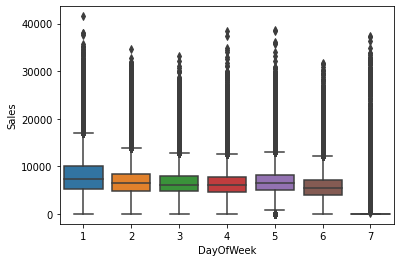

In [41]:
# plotting boxplot for categorical variables


sns.boxplot(x='DayOfWeek',y='Sales',data=new_df)

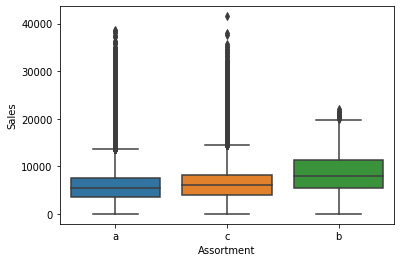

In [42]:
sns.boxplot(x='Assortment',y='Sales',data=new_df)

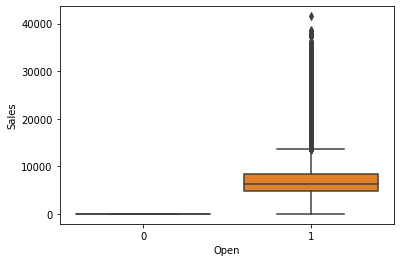

In [43]:
sns.boxplot(x='Open',y='Sales',data=new_df)

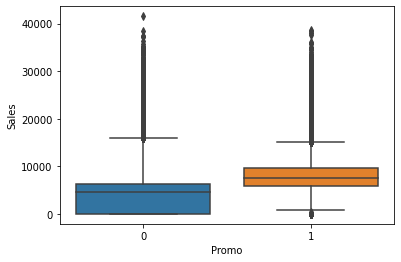

In [44]:
sns.boxplot(x='Promo',y='Sales',data=new_df)

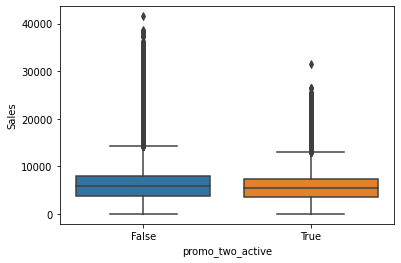

In [45]:
sns.boxplot(x='promo_two_active',y='Sales',data=new_df)

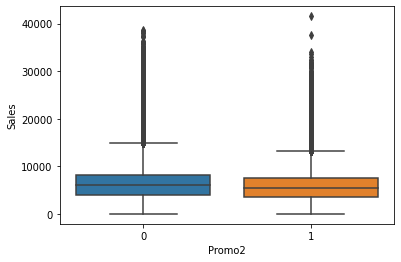

In [46]:
sns.boxplot(x='Promo2',y='Sales',data=new_df)

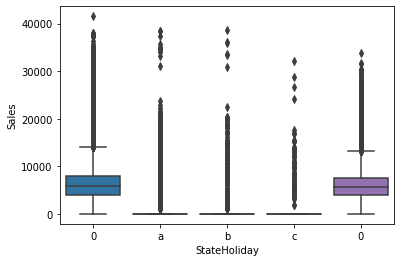

In [47]:
sns.boxplot(x='StateHoliday',y='Sales',data=new_df)

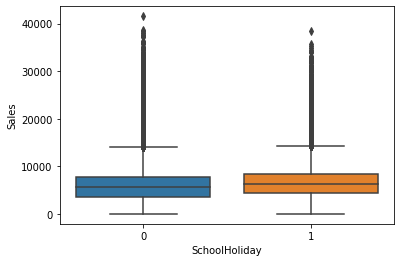

In [48]:
sns.boxplot(x='SchoolHoliday',y='Sales',data=new_df)

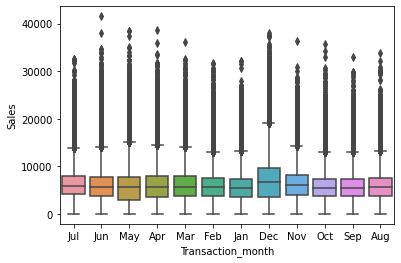

In [49]:
sns.boxplot(x='Transaction_month',y='Sales',data=new_df)

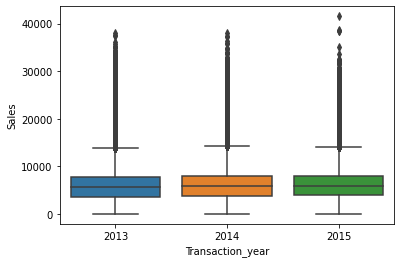

In [50]:
sns.boxplot(x='Transaction_year',y='Sales',data=new_df)

In [51]:
# Dealing with cyclic variables

Data Preparation for 
1. Linear regression
2. Lassor reguralrization
3. Ridge regularization
4. KNN
5. Support vector regressor
5. b. Cross validation and hyper parameter tuning 
6. Decision Trees
7. Ensembles
8. Neural Networks
9. Time Series
10. Anomaly detection

In [52]:
# Splitting into training and tesitng set


In [53]:
# Linear regression


Time series prediction using Prophet

In [54]:
from fbprophet import Prophet

In [73]:
model=Prophet()

In [74]:
dff=new_df[['Date','Sales']]

In [75]:
#dff=new_df.sort_values(by="Date")

In [76]:
dff=dff.rename(columns={'Date':'ds','Sales':'y'})

In [77]:
model.fit(dff)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


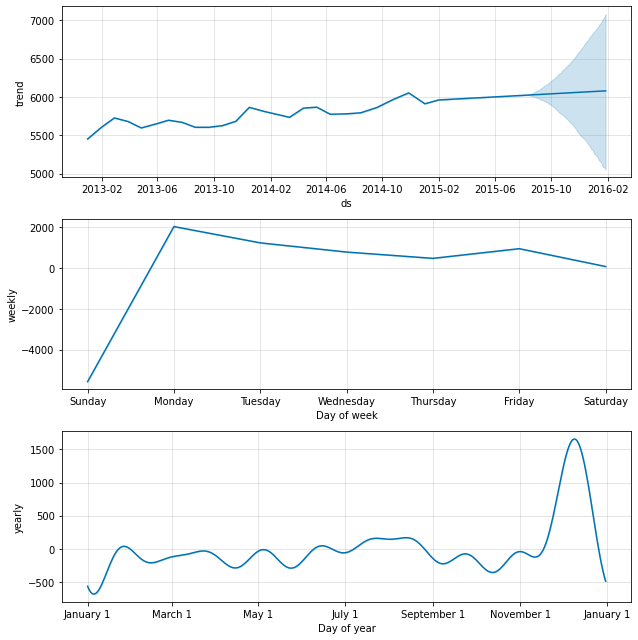

In [79]:
future = model.make_future_dataframe(periods=180)
forecast = model.predict(future)

#figure = model.plot(forecast,xlabel='years',ylabel='Sales')
figure2 = model.plot_components(forecast)

In [81]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1117,2016-01-23,6078.370663,2081.406494,9962.169111,5084.149149,7026.128857,63.211521,63.211521,63.211521,77.740254,77.740254,77.740254,-14.528733,-14.528733,-14.528733,0.0,0.0,0.0,6141.582183
1118,2016-01-24,6078.698587,-3971.633693,4397.942758,5084.692194,7038.145648,-5559.773804,-5559.773804,-5559.773804,-5567.159993,-5567.159993,-5567.159993,7.386189,7.386189,7.386189,0.0,0.0,0.0,518.924783
1119,2016-01-25,6079.026512,3964.243712,11687.013611,5078.162802,7052.299469,2059.325251,2059.325251,2059.325251,2035.998503,2035.998503,2035.998503,23.326748,23.326748,23.326748,0.0,0.0,0.0,8138.351763
1120,2016-01-26,6079.354437,3266.066361,11333.673536,5068.074191,7066.234397,1270.708273,1270.708273,1270.708273,1237.312720,1237.312720,1237.312720,33.395553,33.395553,33.395553,0.0,0.0,0.0,7350.062710
1121,2016-01-27,6079.682361,3060.033964,10802.291283,5057.985580,7079.530882,824.527785,824.527785,824.527785,786.692358,786.692358,786.692358,37.835428,37.835428,37.835428,0.0,0.0,0.0,6904.210147


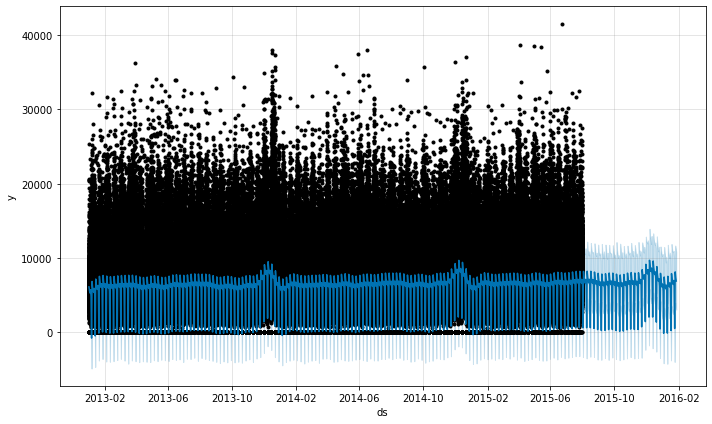

In [83]:
figure3=model.plot(forecast)

In [87]:
model.growth

'linear'

In [88]:
model.history

,ds,y,floor,t,y_scaled
0,2013-01-01,0,0,0.0,0.000000
1,2013-01-01,0,0,0.0,0.000000
2,2013-01-01,0,0,0.0,0.000000
3,2013-01-01,0,0,0.0,0.000000
4,2013-01-01,0,0,0.0,0.000000
...,...,...,...,...,...
1017204,2015-07-31,9082,0,1.0,0.218575
1017205,2015-07-31,10708,0,1.0,0.257707
1017206,2015-07-31,7481,0,1.0,0.180044
1017207,2015-07-31,10460,0,1.0,0.251739


# form clusters and forecast and analyze the data cluster wise.